In [41]:

import tensorflow as tf

In [11]:
img_height, img_width = 224, 224
batch_size = 32


data_dir = '/home/gf/works/datasets/dogs-vs-cats/train_dired/'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [6]:
base_model = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(img_height, img_width, 3),
    pooling=None,
    classes=2,
)

In [7]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
x_in = tf.keras.layers.Input(shape=(img_height, img_width, 3))
x_out = base_model(x_in)
x_out = tf.keras.layers.GlobalAveragePooling2D()(x_out)
x_pred = tf.keras.layers.Dense(1, activation='softmax')(x_out)

In [19]:
model = tf.keras.Model(inputs=x_in, outputs=x_pred)

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
# model.fit(train_ds, validation_data=val_ds, epochs=10)

# Latent space

In [8]:
from random import shuffle
from glob import glob
import numpy as np
from PIL import Image
from tensorflow import keras

model = keras.models.load_model('models/model_v1.h5')


In [23]:
flist = glob('/home/gf/works/datasets/dogs-vs-cats/train/*.jpg')
shuffle(flist)
flist = flist[:100]

In [24]:
ii = np.random.randint(100)
flist[ii].split('/')[-1].split('.')[0]

'cat'

In [34]:
imgs = []
labels =[]
for f in flist:
    img = Image.open(f)
    img = img.resize((224,224))
    img = np.array(img)/255
    imgs.append(img)
    lbl = f.split('/')[-1].split('.')[0]
    labels.append(int(lbl!='cat'))

In [35]:
np.mean(labels)

0.48

In [37]:
y_pred = model.predict(np.array(imgs), batch_size=16)

7/7 [==============================] - 39s 6s/step


In [38]:
np.mean(np.argmax(y_pred,axis=1)==np.array(labels))

0.88

In [42]:
x_in = tf.keras.layers.Input(shape=(224, 224, 3))
x = model.layers[1](x_in)
x_out = model.layers[2](x)
latent_model = tf.keras.Model(inputs=x_in, outputs=x_out)

In [43]:
y_latent = latent_model.predict(np.array(imgs), batch_size=16)

7/7 [==============================] - 32s 4s/step


In [44]:
y_latent.shape

(100, 512)

In [45]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

In [47]:
latent2d = tsne.fit_transform(y_latent)

/home/gf/miniconda3/envs/aansoo/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/gf/miniconda3/envs/aansoo/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [48]:
latent2d.shape

(100, 2)

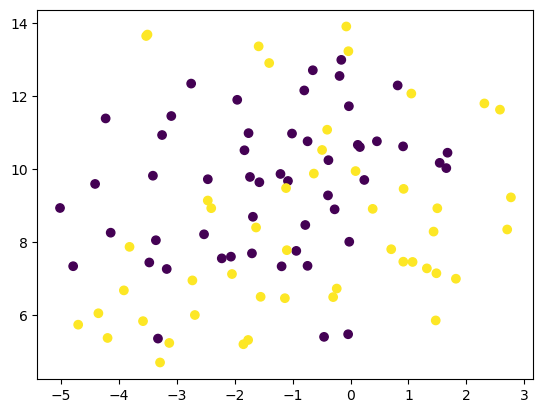

In [50]:
import pylab as plt
plt.scatter(latent2d[:,0],latent2d[:,1],c=labels)